In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.neural_networks import bisensory_nn
from src.utils import *

In [2]:
n_sensory = 5
n_cortex = 5
n_motor = 1
learning_rate = 1e-5
time = 10
input_fluctuation_rate = 0.1

light_strength = 0.5

bsnn = bisensory_nn(n_sensory, n_cortex, n_motor)

for neuron in bsnn:
    neuron.input_fluctuation_rate = input_fluctuation_rate


# Congenital Sensory Loss

Negative bias apply on left sensory neurons.

In [3]:
for neuron in bsnn.left_sensory.neurons:
    neuron.bias = -0.1

In [4]:
recording = []
for _ in range(100):
    rand = np.random.normal(0.5, 0.1, (n_sensory, 1))
    bsnn.add_input(
        data0=(rand).flatten(),
        data1=(rand).flatten(),
    )

    recording.extend(bsnn.dynamic(time, learning_rate=learning_rate, is_record=True))
sensory1, cortex1, motor1 = record_splitter(recording, "bisensory")

Text(0.5, 0, 'Time')

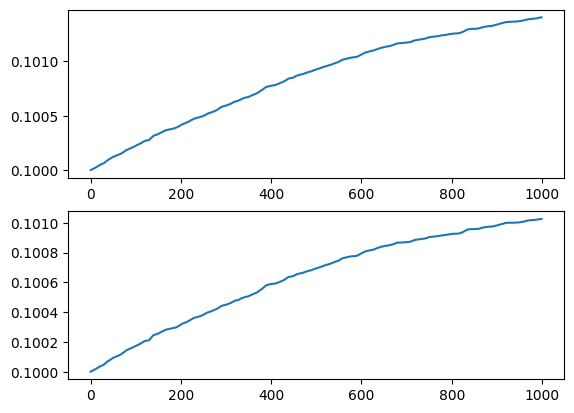

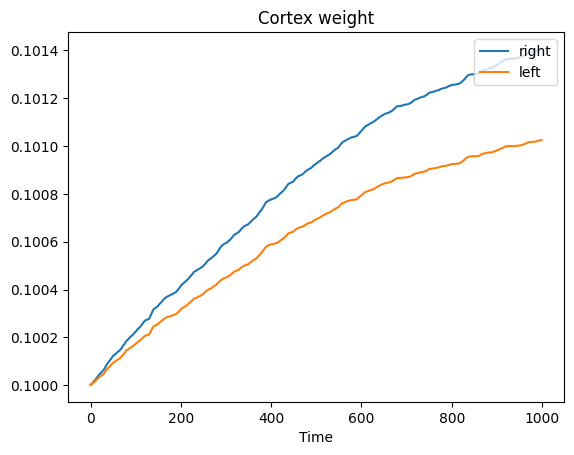

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_weight_value(cortex1, ax1, presynaptic_neuron_id=range(n_sensory))
plot_weight_value(cortex1, ax2, presynaptic_neuron_id=range(n_sensory, 2 * n_sensory))


fig, ax = plt.subplots()
plot_weight_value(cortex1, ax, presynaptic_neuron_id=range(n_sensory), label="right")
plot_weight_value(
    cortex1, ax, presynaptic_neuron_id=range(n_sensory, 2 * n_sensory), label="left"
)
ax.legend(loc="upper right")
ax.set_title("Cortex weight")
ax.set_xlabel("Time")

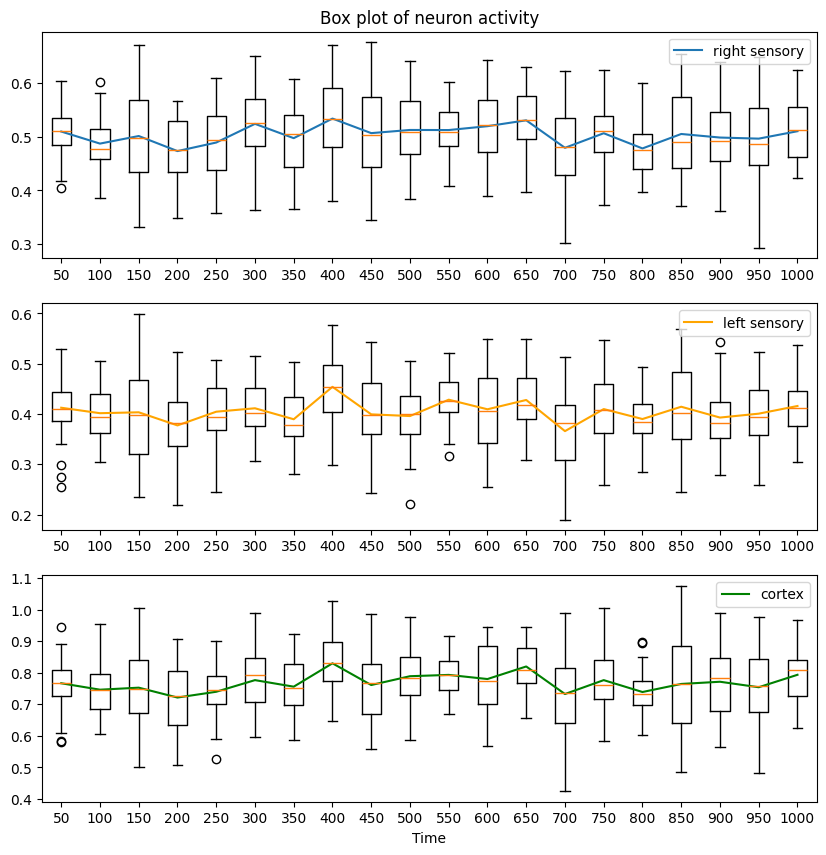

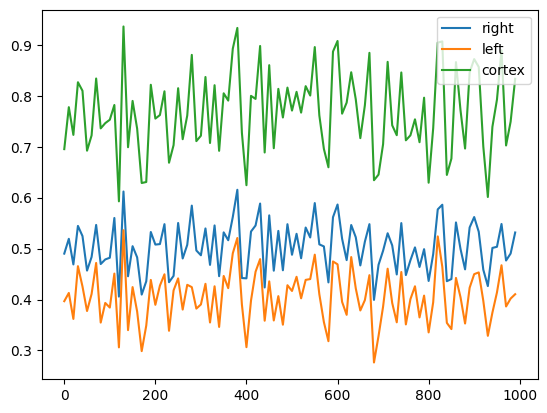

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
plot_neuron_activity(
    sensory1[0], ax1, is_box_plot=True, label="right sensory", num_box=20
)
plot_neuron_activity(
    sensory1[1], ax2, is_box_plot=True, label="left sensory", num_box=20, color="orange"
)
plot_neuron_activity(
    cortex1, ax3, is_box_plot=True, label="cortex", num_box=20, color="green"
)
ax1.set_title("Box plot of neuron activity")
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax3.set_xlabel("Time")

fig, ax = plt.subplots()
plot_neuron_activity(sensory1[0], ax, is_mean_plot=True, label="right")
plot_neuron_activity(sensory1[1], ax, is_mean_plot=True, label="left")
plot_neuron_activity(cortex1, ax, is_mean_plot=True, label="cortex")
ax.legend(loc="upper right")

# Treatment to Sensory Loss

Cut down the input strength to right-sensory (normal) neurons.

In [7]:
recording = []
for _ in range(1000):
    rand = np.random.normal(0.5, 0.1, (n_sensory, 1))
    bsnn.add_input(
        data0=(rand * 0.01).flatten(),
        data1=(rand).flatten(),
    )

    recording.extend(bsnn.dynamic(time, learning_rate=learning_rate, is_record=True))
sensory2, cortex2, motor2 = record_splitter(recording, "bisensory")

Text(0.5, 0, 'Time')

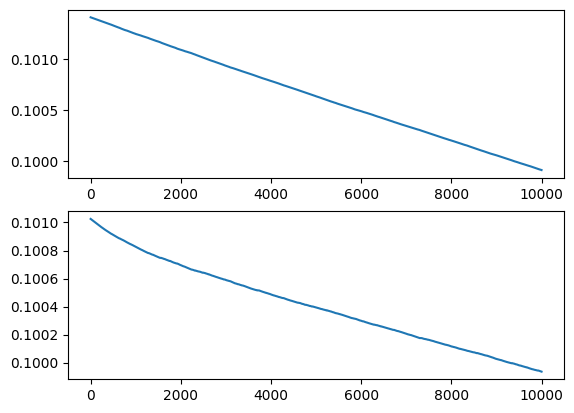

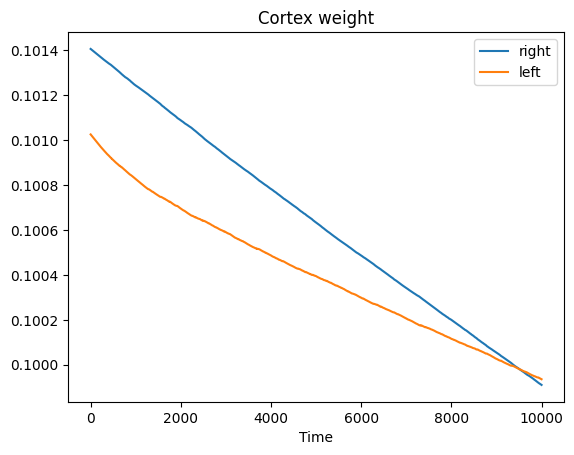

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_weight_value(cortex2, ax1, presynaptic_neuron_id=range(n_sensory))
plot_weight_value(cortex2, ax2, presynaptic_neuron_id=range(n_sensory, 2 * n_sensory))


fig, ax = plt.subplots()
plot_weight_value(cortex2, ax, presynaptic_neuron_id=range(n_sensory), label="right")
plot_weight_value(
    cortex2, ax, presynaptic_neuron_id=range(n_sensory, 2 * n_sensory), label="left"
)
ax.legend(loc="upper right")
ax.set_title("Cortex weight")
ax.set_xlabel("Time")

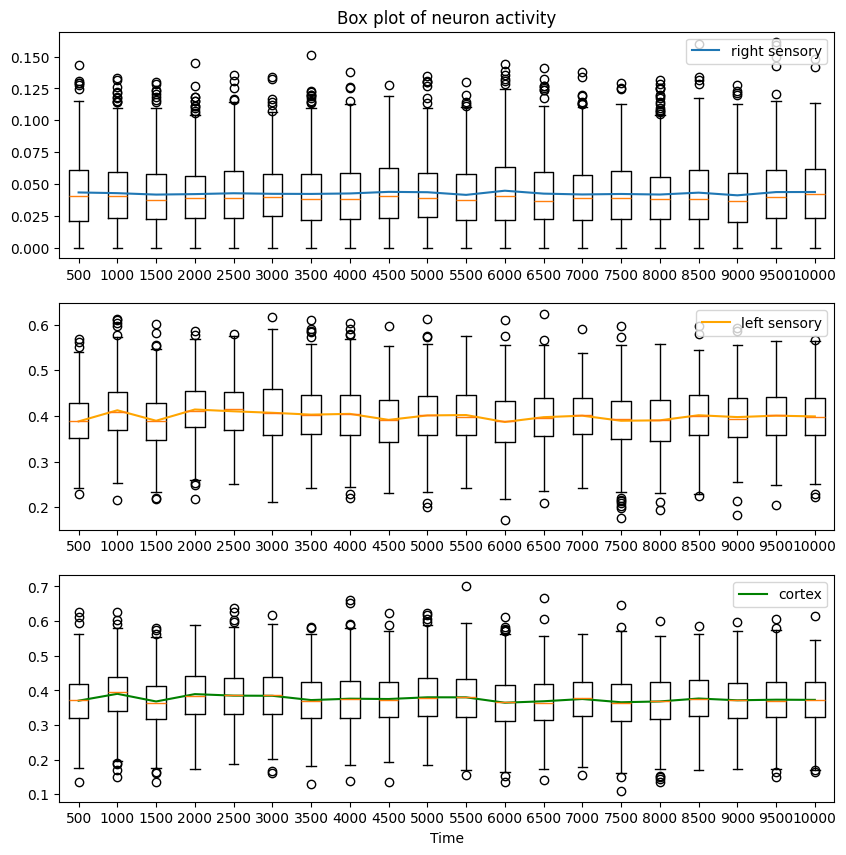

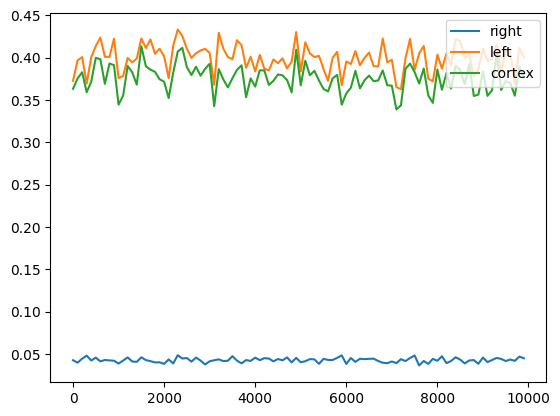

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
plot_neuron_activity(
    sensory2[0], ax1, is_box_plot=True, label="right sensory", num_box=20
)
plot_neuron_activity(
    sensory2[1], ax2, is_box_plot=True, label="left sensory", num_box=20, color="orange"
)
plot_neuron_activity(
    cortex2, ax3, is_box_plot=True, label="cortex", num_box=20, color="green"
)
ax1.set_title("Box plot of neuron activity")
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax3.set_xlabel("Time")

fig, ax = plt.subplots()
plot_neuron_activity(sensory2[0], ax, is_mean_plot=True, label="right")
plot_neuron_activity(sensory2[1], ax, is_mean_plot=True, label="left")
plot_neuron_activity(cortex2, ax, is_mean_plot=True, label="cortex")
ax.legend(loc="upper right")

# Post-Treatment

Turn down the learning rate to represent that neuron are more stable as people age.

In [10]:
learning_rate = 1e-10

In [11]:
recording = []
for _ in range(300):
    rand = np.random.normal(0.5, 0.1, (n_sensory, 1))
    bsnn.add_input(
        data0=(rand).flatten(),
        data1=(rand).flatten(),
    )

    recording.extend(bsnn.dynamic(time, learning_rate=learning_rate, is_record=True))
sensory3, cortex3, motor3 = record_splitter(recording, "bisensory")

<Axes: >

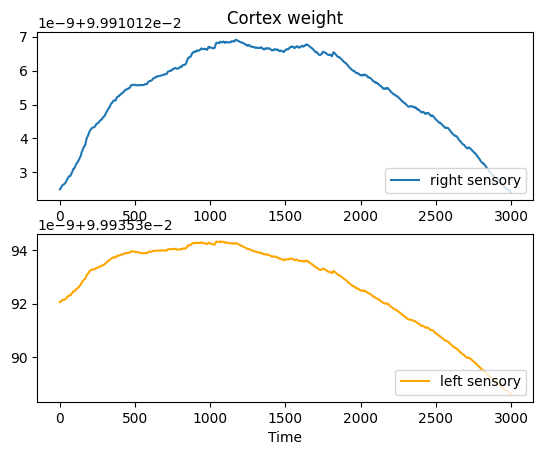

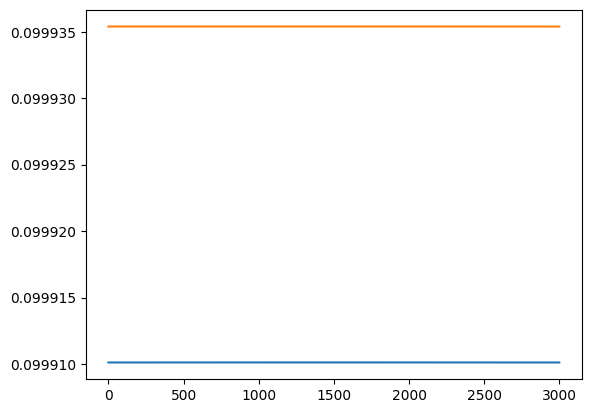

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plot_weight_value(
    cortex3, ax1, presynaptic_neuron_id=range(n_sensory), label="right sensory"
)
plot_weight_value(
    cortex3,
    ax2,
    presynaptic_neuron_id=range(n_sensory, 2 * n_sensory),
    label="left sensory",
    color="orange",
)
ax1.legend(loc="lower right")
ax2.legend(loc="lower right")
ax1.set_title("Cortex weight")
ax2.set_xlabel("Time")


fig, ax = plt.subplots()
plot_weight_value(cortex3, ax, presynaptic_neuron_id=range(n_sensory), label="right")
plot_weight_value(
    cortex3, ax, presynaptic_neuron_id=range(n_sensory, 2 * n_sensory), label="left"
)

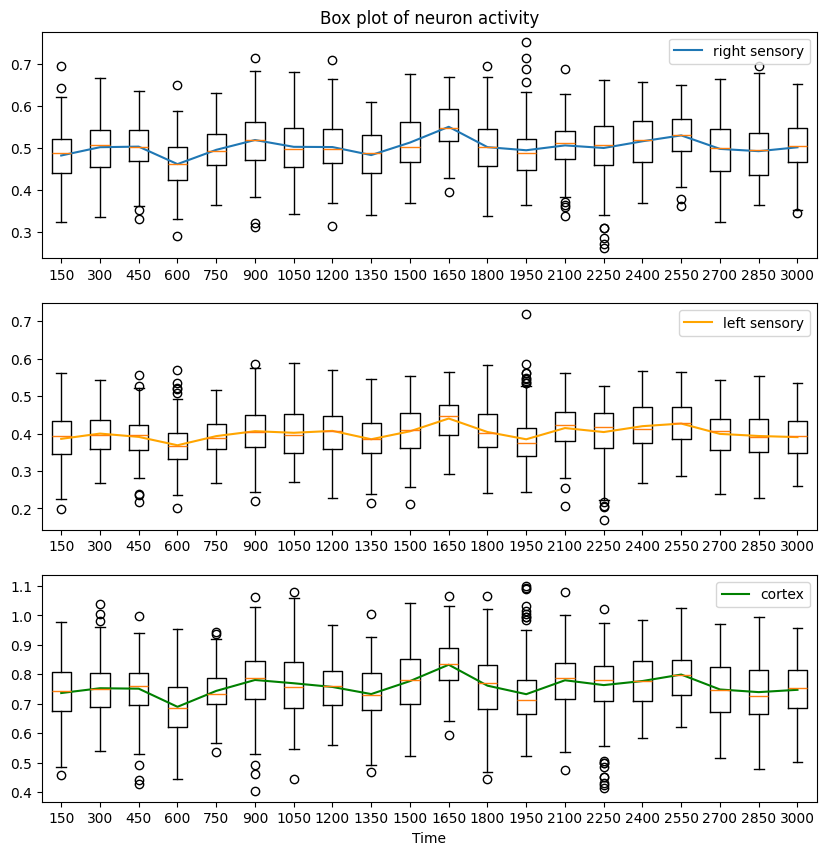

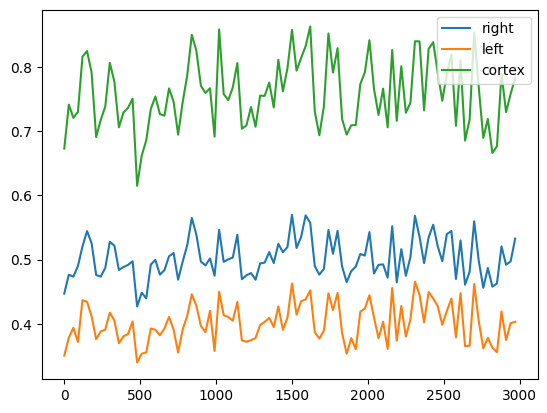

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
plot_neuron_activity(
    sensory3[0], ax1, is_box_plot=True, label="right sensory", num_box=20
)
plot_neuron_activity(
    sensory3[1], ax2, is_box_plot=True, label="left sensory", num_box=20, color="orange"
)
plot_neuron_activity(
    cortex3, ax3, is_box_plot=True, label="cortex", num_box=20, color="green"
)
ax1.set_title("Box plot of neuron activity")
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax3.set_xlabel("Time")

fig, ax = plt.subplots()
plot_neuron_activity(sensory3[0], ax, is_mean_plot=True, label="right")
plot_neuron_activity(sensory3[1], ax, is_mean_plot=True, label="left")
plot_neuron_activity(cortex3, ax, is_mean_plot=True, label="cortex")
ax.legend(loc="upper right")

Text(10550, 0.1001, 'After\nTreatment')

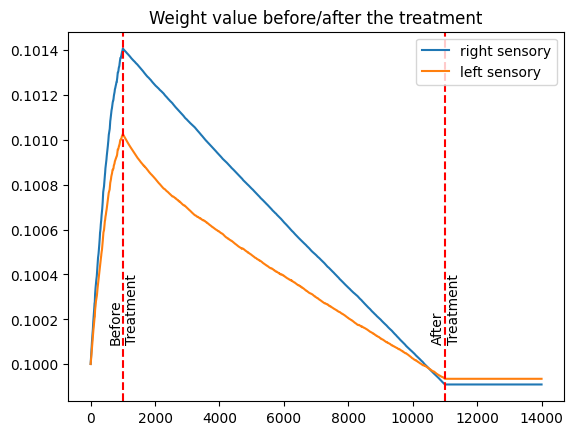

In [14]:
cortex = [*cortex1, *cortex2, *cortex3]

fig, ax = plt.subplots()
plot_weight_value(
    cortex, ax, presynaptic_neuron_id=range(n_sensory), label="right sensory"
)
plot_weight_value(
    cortex,
    ax,
    presynaptic_neuron_id=range(n_sensory, 2 * n_sensory),
    label="left sensory",
)
ax.legend(loc="upper right")
ax.set_title(
    "Weight value before/after the treatment"
)

ax.axvline(x=1000, color="r", linestyle="--")
ax.axvline(x=11000, color="r", linestyle="--")
ax.text(550, 0.1001, "Before\nTreatment", rotation=90)
ax.text(10550, 0.1001, "After\nTreatment", rotation=90)